# Lecture 3
    1. White board explanation
    2. bisect_eq2.py
    3. What could we do better? 
    4. bisect.py
    5. Machine epsilon

In [2]:
%cd '/home/cody/Physics 331/Textbook Programs/Chapter 2'
%ls

/home/cody/Physics 331/Textbook Programs/Chapter 2
bisect_eq2.py          deriv_eq2.py  figure 2.1.png  figure 2.4.png
bisect.py              equation2.py  Figure 2.2.png  newton.py
Chapter 2 Stuff.ipynb  equation3.py  figure 2.3.png  __pycache__/


First lets make a plot of the function we want to solve for, 

$f(x) = e^x - 3x^2$

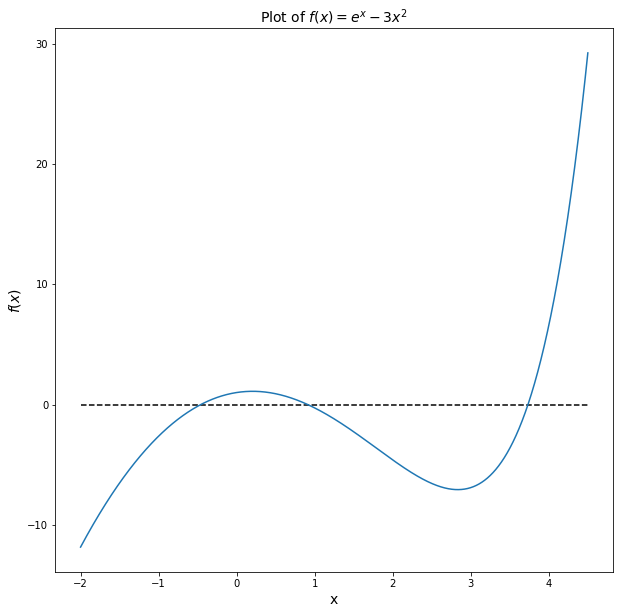

In [105]:
import numpy as np
import matplotlib.pyplot as plt

plt.figure(figsize = (10,10))

x = np.linspace(-2,4.5,10000)
plt.hlines(0, -2,4.5, linestyles='dashed')
plt.plot(x, np.exp(x) - 3*x**2)

plt.title('Plot of $f(x) = e^x - 3x^2$', size = 14)
plt.ylabel('$f(x)$', size = 14)
plt.xlabel('x', size = 14)

plt.show()

just by looking at the graph we see where are 3 zeros we could find

In [43]:
# %load bisect_eq2.py
import numpy as np

def bisect_eq2(xL, xR):
    """
    Find a solution to the equation f(x) = e^x - 3*x^2 = 0 using a bisection
    method. Starts with the interval between xL, xR and returns a
    solution. The Solution will be accurate to 0.5e-5. f(xL) and f(xR)
    need to have different signs (one positive, one negative).

    Inputs
    ----------
    xL: Lower 'x' value I want to evaluate the function f(x) at
    xR: Higher 'x' value I want to evaluate the function f(x) at

    Output
    ----------
    x_zero: 'x' value that when put into f(x) returns zero.
    """

    #Evaluate the function at the left and right values.
    fL = np.exp(xL) - 3*xL**2
    fR = np.exp(xR) - 3*xR**2

    #Keep doing bisect until the difference between the two values is less than
    # 10**-5
    while xR - xL > 1.0e-5:
        xMP = 0.5*(xL + xR)    # Mid-point
        fMP = np.exp(xMP) - 3*xMP**2 # Function evaluated at the mid point

        if fMP * fL > 0.0:         # mp value has same sign as left
            xL = xMP               # Reset the left to be the mp
            f_left = fMP
        else:
            xR = xMP               # or set right value to mp
    x_zero = 0.5*(xL + xR)
    return x_zero


In [49]:
x_zero = bisect_eq2(-1,0)

print(x_zero)

-0.4589653015136719


In [45]:
np.exp(x_zero) - 3*x_zero**2

-1.0272198213034933e-05

In [53]:
x_zero2 = bisect_eq2(0,2)
x_zero3 = bisect_eq2(2,4.5)
print(x_zero2,x_zero3)

0.9100074768066406 3.733078956604004


In [54]:
np.exp(x_zero2) - 3*x_zero2**2, np.exp(x_zero3) - 3*x_zero3**2

(2.847215063717101e-07, -1.3980188242612712e-06)

In [47]:
bisect_eq2(4,5)

4.999996185302734

In [48]:
bisect_eq2(-10,10)

-0.45896053314208984

This works but it could be a lot better.

1. What if I want to solve other equations? 

2. Accuracy is fixed

3. Requires the user to put in good numbers, if you accidentaly switch the numbers you'll get a problem. Everything will run fine but xR - xL > 1.0e-5 will return False on the first run so it will just find the mid point of the two inputs

        bisect_eq2(0,-1)
        -0.5
4. What if we got lucky and guessed the exact zero? 

In [2]:
# %load bisect.py
import numpy as np
def bisect(func_name, xL, xR):
    """
    Find the solution the input equation f(x) = 0 for some input function. Start
    with the interval xL xR, and return a solution with a relative error
    0.5e-5.

    Inputs
    ----------
    func_name: This is the name of the function that I want to find roots for

    xL:        Smaller 'x' value I want to evaluate func_name at

    xR:        Higher 'x' value I want to evaluate func_name at

    Output
    ----------
    x_zero: 'x' value that returns func_name(x) = 0
    """
    fL = func_name(xL)
    fR = func_name(xR)
    
    if fL * fR > 0:     # Same sign on both sides
        return print("Both values give the same sign.") #Exit if inputs are wrong

    while np.abs( xR - xL ) > 1.0e-5 * np.max(np.abs([xL,xR])):
        xMP = 0.5*(xL + xR)
        fMP = func_name(xMP)

        if fMP == 0:       # Got lucky and found the root exactly
            return xMP

        if fMP * fR > 0:
            xR = xMP
            fR = fMP

        else:
            xL = xMP

    x_zero = 0.5 * (xL + xR)

    return x_zero


In [1]:
bisect(np.exp(y)-3*y**2, 1, 0)

NameError: name 'bisect' is not defined

In [3]:
# %load equation2.py
import numpy as np
def equation2(x):
    """
    Equation 2.2 from the book.

    Input
    ----------
    x: Value I want to evaluate equation 2.2 at

    Output
    ----------
    Value of the function at 'x', f(x)
    """
    return np.exp(x) - 3*x**2


In [68]:
# %load equation3.py
import numpy as np
def equation3(theta):
    """
    Equation 2.3 from the book.

    Input
    ----------
    theta: Angle that I want to evaluate equation 2.3 at. Input should be in degrees

    Output
    ----------
    Value of the function at theta, f(theta)

    """
    th_rad = np.radians(theta)   # Convert the input into radian

    return 250*np.cos(th_rad)* (np.sin(th_rad) + np.sqrt( np.sin(th_rad)**2 + 0.08 ) ) - 200


In [5]:
bisect(equation2, 1, 0)

0.9100074768066406

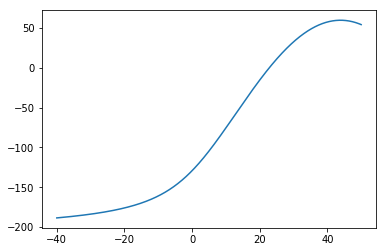

In [107]:
foo = np.linspace(-40, 50,10000)
plt.plot(foo,equation3(foo))

In [109]:
ans = bisect(equation3, -40,50)

In [110]:
equation3(ans)

0.0001295492541260046

# Machine Precision
The computer can only keep track of so many digits

In [132]:
#Don't worry about this too much, this just tells you what that smallest number is
import sys
eps = sys.float_info.epsilon
print(eps)

2.220446049250313e-16


In [147]:
x = 1
y = 0.000000000000001
z = 0.0000000000000001
print(x+y, x+z)

1.000000000000001 1.0


In [151]:
#This is relative error
x = 1e10
y = 0.000000000000001e10
z = 0.00000000000000001e10
print(x+y, x+z)

10000000000.00001 10000000000.0
